In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
DPQ = pd.read_sas('./data/DPQ_L_Depression.xpt', format='xport')
INQ = pd.read_sas('./data/INQ_L_Income.xpt', format='xport')
PAQ = pd.read_sas('./data/PAQ_L_Physical_activity.xpt', format='xport')

DPQ = pd.merge(DPQ, INQ, how="inner", left_on="SEQN", right_on="SEQN")
DPQ = pd.merge(DPQ, PAQ, how="inner", left_on="SEQN", right_on="SEQN")

DPQ = DPQ[DPQ[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']].notnull().all(1)]

numeric_cols = DPQ.select_dtypes(include=['float64']).columns
for col in numeric_cols:
    DPQ[col] = DPQ[col].round().astype("Int64")

In [5]:
DPQ.head(30)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,INDFMMPC,INQ300,IND310,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680
1,130379,0,0,1,0,0,0,0,0,0,...,3,1,<NA>,4,b'W',45,3,b'W',45,480
2,130380,0,0,1,1,0,0,0,0,0,...,2,2,1,1,b'W',20,0,b'',<NA>,240
3,130386,0,0,0,0,0,1,0,0,0,...,2,2,2,1,b'W',30,1,b'M',30,180
8,130391,3,3,3,3,3,3,3,2,1,...,1,2,1,3,b'D',10,1,b'D',20,240
9,130392,0,0,0,1,0,0,0,0,0,...,3,2,4,0,b'',<NA>,0,b'',<NA>,300
10,130393,0,0,0,1,1,0,0,0,0,...,3,1,<NA>,4,b'W',45,1,b'W',60,720
12,130395,1,1,2,3,3,1,2,1,0,...,1,2,1,3,b'W',15,0,b'',<NA>,360
13,130396,1,1,1,1,1,1,1,0,0,...,3,2,5,3,b'W',20,0,b'',<NA>,240
14,130397,1,1,1,1,3,1,0,0,0,...,3,1,<NA>,0,b'',<NA>,0,b'',<NA>,480
16,130399,0,0,0,1,0,0,0,0,0,...,3,1,<NA>,6,b'W',90,2,b'W',60,360


In [6]:
cols = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']

depressed_patients = DPQ[
    (DPQ['DPQ020'].isin([2, 3])) &
    (DPQ['DPQ010'].isin([2, 3])) &
    ((DPQ[cols].isin([2, 3])).sum(axis=1) >= 5)
]

depressed_patients.count()


SEQN        231
DPQ010      231
DPQ020      231
DPQ030      231
DPQ040      231
DPQ050      231
DPQ060      231
DPQ070      231
DPQ080      231
DPQ090      231
DPQ100      231
INDFMMPI    196
INDFMMPC    216
INQ300      216
IND310      157
PAD790Q     231
PAD790U     231
PAD800      144
PAD810Q     231
PAD810U     231
PAD820       70
PAD680      231
dtype: int64

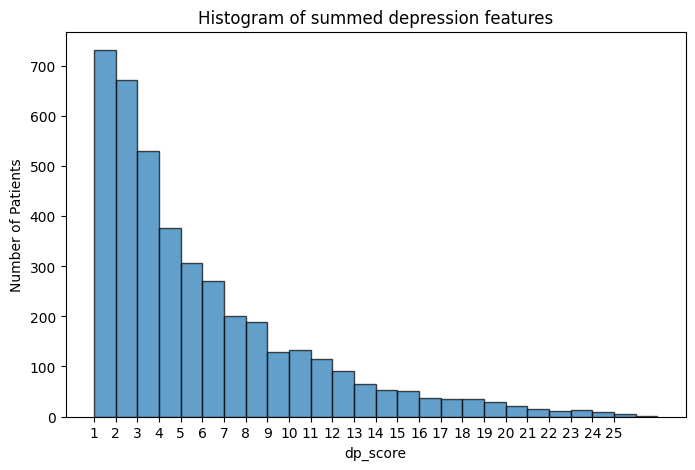

In [ ]:
DPQ = DPQ[~DPQ[cols].isin([7, 9]).any(axis=1)] #4127
DPQ['dp_score'] = DPQ[cols].sum(axis=1)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(DPQ['dp_score'], bins=range(int(DPQ['dp_score'].min()), int(DPQ['dp_score'].max()) + 2), 
         edgecolor='black', alpha=0.7)
plt.title('Histogram of summed depression features')
plt.xlabel('dp_score')
plt.ylabel('Number of Patients')
plt.xticks(range(int(DPQ['dp_score'].min()), int(DPQ['dp_score'].max()) + 1))
plt.show()
